In [1]:
from datareader import Datareader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import math
import datetime
import warnings
warnings.filterwarnings('ignore')

## Actual conditions table

In [2]:
# pulling data from actual conditions table directly into pandas dataframe
reader = Datareader()
df = pd.read_sql_table('weather', reader.engine, index_col='id', parse_dates=['timestamp', 'dt'])
df

,timestamp,city,temperature,pressure,humidity,temp_min,temp_max,weather,weather_detail,wind_speed,wind_deg,wind_gust,visibility,clouds,dt
id,,,,,,,,,,,,,,,
1,2019-03-15 12:02:32.466853,Warsaw,7.19,998.0,87.0,5.56,8.89,Rain,light intensity shower rain,4.10,270.000,NaN,10000,75.0,2019-03-15 12:02:31
2,2019-03-15 12:02:32.524549,London,13.59,1006.0,71.0,12.00,15.00,Rain,light rain,13.40,280.000,21.1,10000,75.0,2019-03-15 12:02:31
3,2019-03-15 12:02:32.528978,Istanbul,10.19,1009.0,53.0,8.89,11.11,Clouds,broken clouds,3.10,20.000,NaN,10000,75.0,2019-03-15 12:02:31
4,2019-03-15 12:02:32.529369,Cape Town,30.77,1012.0,43.0,25.56,35.00,Clear,clear sky,5.10,150.000,NaN,10000,0.0,2019-03-15 12:02:31
5,2019-03-15 12:02:32.531098,Quito,11.59,1026.0,93.0,9.44,14.00,Fog,fog,1.00,10.000,NaN,10000,90.0,2019-03-15 12:02:31
6,2019-03-15 12:02:32.531632,Berlin,9.82,999.0,61.0,8.33,11.11,Clouds,broken clouds,9.80,240.000,NaN,10000,75.0,2019-03-15 12:02:31
7,2019-03-15 12:02:32.532019,Madrid,17.71,1027.0,27.0,16.00,20.00,Clear,clear sky,1.50,NaN,NaN,10000,0.0,2019-03-15 12:02:31
8,2019-03-15 12:02:32.538539,Lagos,21.64,1025.0,26.0,18.89,23.89,Clear,clear sky,5.10,90.000,NaN,10000,0.0,2019-03-15 12:02:32
9,2019-03-15 12:02:32.538957,Rio de Janeiro,28.99,1012.0,79.0,28.00,31.00,Clouds,broken clouds,2.10,30.000,NaN,9000,75.0,2019-03-15 12:02:32


In [3]:
cities = df.city.unique()
cities

array(['Warsaw', 'London', 'Istanbul', 'Cape Town', 'Quito', 'Berlin',
       'Madrid', 'Lagos', 'Rio de Janeiro', 'Sydney', 'Buenos Aires',
       'Mexico', 'Bangkok', 'Rome', 'Beijing', 'Tokyo', 'Paris',
       'New York', 'Mumbai', 'Moscow'], dtype=object)

In [4]:
# number of cities data is collected for
len(cities)

20

In [5]:
# number of observations for each city
len(df[df.city=='London'])

80

## Temperatures by city

In [6]:
def get_temperature(city):
    data = df[df.city==city]
    data.set_index('timestamp', inplace=True)
    return data['temperature']

def plotter(data_function, plotting_function=plt.plot):
    fig = plt.figure(figsize=(18,25))
    num_columns = 3
    num_rows = math.ceil(len(cities)/num_columns)
    register_matplotlib_converters()
    for num, city in enumerate(cities):
        num += 1
        ax = fig.add_subplot(num_rows, num_columns, num)
        t = data_function(city)
        plotting_function(t)
        ax.grid()
        ax.set_title(city)
        ax.set_xlabel('')
    plt.show();

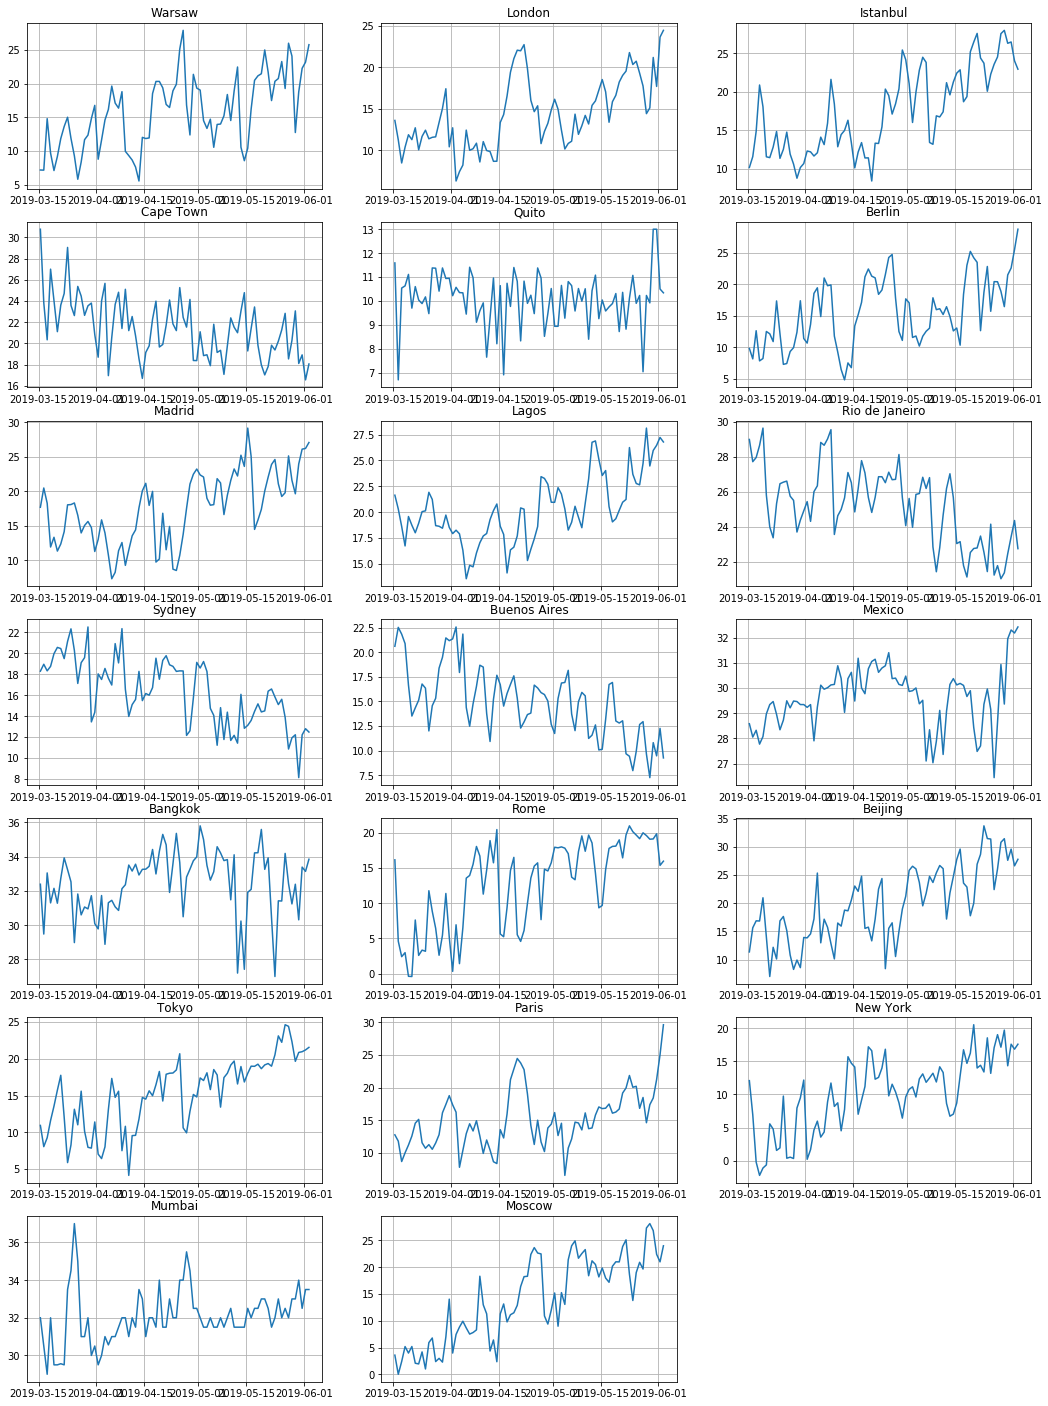

In [7]:
plotter(get_temperature)

## Temperature distributions by city

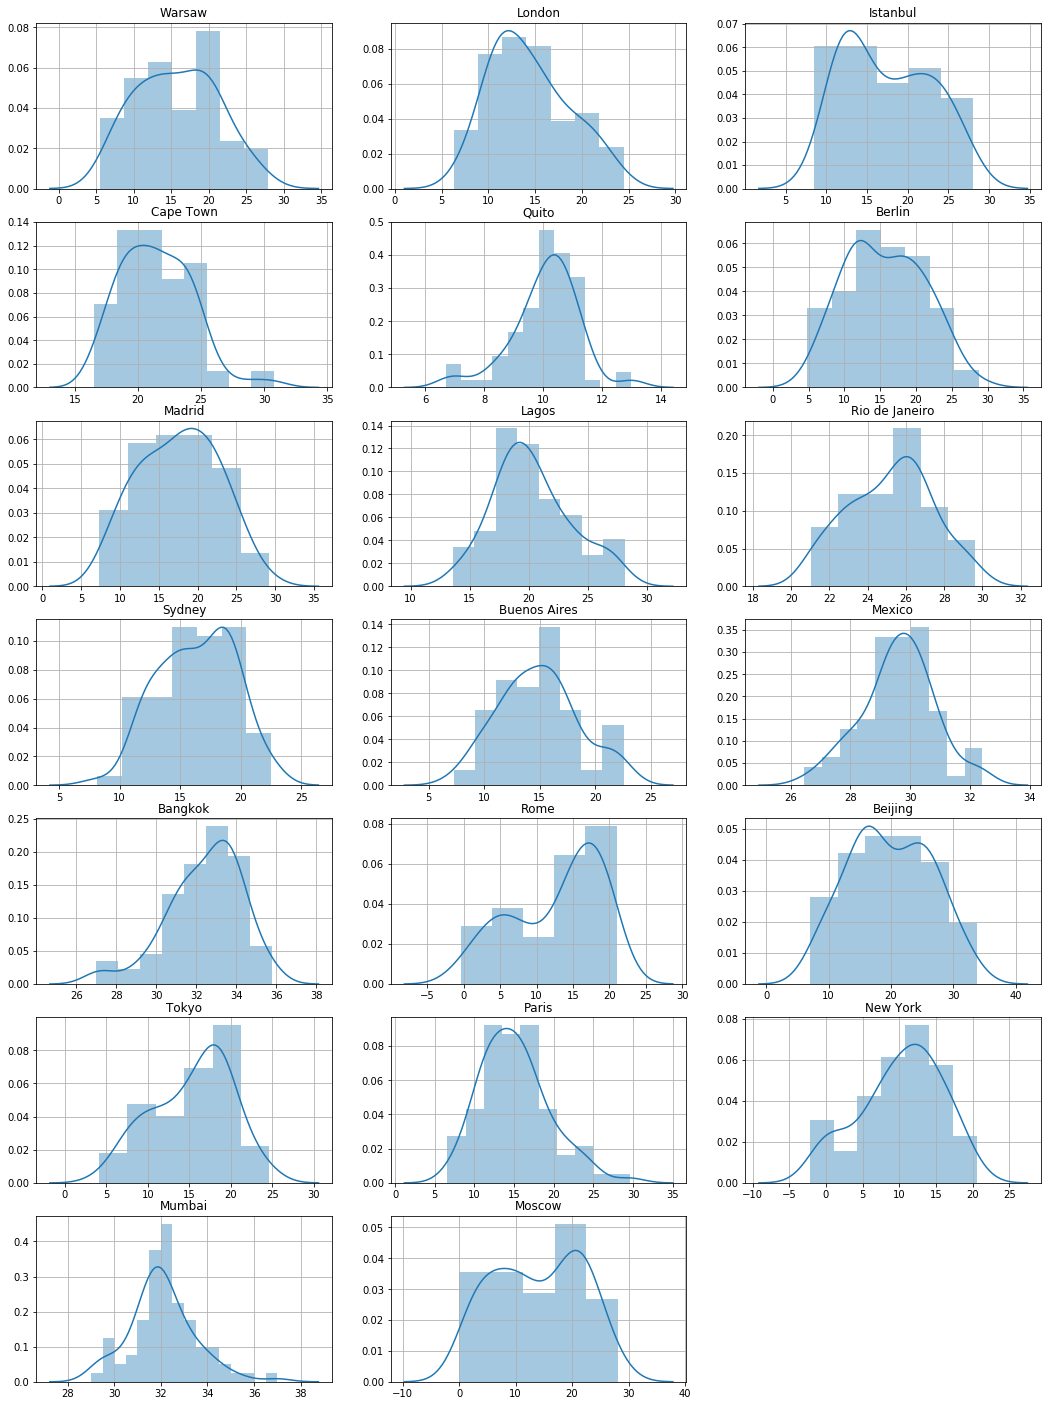

In [8]:
plotter(get_temperature, sns.distplot)

## Forecast table

In [9]:
# download table directly into dataframe
# df1 = pd.read_sql_table('items', reader.engine, index_col='id', parse_dates=['timestamp', 'dt'])
query = "SELECT items.timestamp, forecasts.id, city, temperature, dt FROM items JOIN forecasts ON items.forecast_id = forecasts.id"
df1 = pd.read_sql_query(query, reader.engine, index_col='id', parse_dates=['timestamp', 'dt'])

In [10]:
# select only those forecasts that relate to 12 o'clock - only they can be compared with actuals
df1['time'] = df1['dt'].apply(lambda x: x.hour)
df1 = df1[df1.time == 12]

In [11]:
# create index showing how many days forecast goes forward
df1['days'] = df1.timestamp - df1.dt
df1['days'] = df1.days.apply(lambda x: -x.days)
df1['timestamp'] = df1['timestamp'].apply(lambda x: pd.Timestamp(day=x.day, month=x.month, year=x.year, hour=12, minute=0))
df1.reset_index(inplace=True)
# df1 is a dataframe containing all forecast data - it can be used for any analysis on forecasts
df1

,id,timestamp,city,temperature,dt,time,days
0,1,2019-03-15 12:00:00,Warsaw,5.56,2019-03-16 12:00:00,12,1
1,1,2019-03-15 12:00:00,Warsaw,11.53,2019-03-17 12:00:00,12,2
2,1,2019-03-15 12:00:00,Warsaw,8.51,2019-03-18 12:00:00,12,3
3,1,2019-03-15 12:00:00,Warsaw,8.09,2019-03-19 12:00:00,12,4
4,1,2019-03-15 12:00:00,Warsaw,7.90,2019-03-20 12:00:00,12,5
5,2,2019-03-15 12:00:00,London,12.36,2019-03-16 12:00:00,12,1
6,2,2019-03-15 12:00:00,London,8.18,2019-03-17 12:00:00,12,2
7,2,2019-03-15 12:00:00,London,9.26,2019-03-18 12:00:00,12,3
8,2,2019-03-15 12:00:00,London,11.94,2019-03-19 12:00:00,12,4
9,2,2019-03-15 12:00:00,London,12.95,2019-03-20 12:00:00,12,5


## Forecast vs. Actual

In [12]:
actual = df[['dt', 'city', 'temperature', 'timestamp']]
actual['dt'] = actual['dt'].apply(lambda x: pd.Timestamp(day=x.day, month=x.month, year=x.year, hour=12, minute=0))
actual['days'] = 0
combined = df1.append(actual)
combined.drop(['id', 'time'], axis=1, inplace=True)
#combined is dataframe combing forecasts with actual observations
combined

,city,days,dt,temperature,timestamp
0,Warsaw,1,2019-03-16 12:00:00,5.56,2019-03-15 12:00:00.000000
1,Warsaw,2,2019-03-17 12:00:00,11.53,2019-03-15 12:00:00.000000
2,Warsaw,3,2019-03-18 12:00:00,8.51,2019-03-15 12:00:00.000000
3,Warsaw,4,2019-03-19 12:00:00,8.09,2019-03-15 12:00:00.000000
4,Warsaw,5,2019-03-20 12:00:00,7.90,2019-03-15 12:00:00.000000
5,London,1,2019-03-16 12:00:00,12.36,2019-03-15 12:00:00.000000
6,London,2,2019-03-17 12:00:00,8.18,2019-03-15 12:00:00.000000
7,London,3,2019-03-18 12:00:00,9.26,2019-03-15 12:00:00.000000
8,London,4,2019-03-19 12:00:00,11.94,2019-03-15 12:00:00.000000
9,London,5,2019-03-20 12:00:00,12.95,2019-03-15 12:00:00.000000


In [13]:
combined = combined.groupby('city').apply(lambda x: x.pivot(index='dt', columns='days', values='temperature').dropna())
combined

days                             0      1      2      3      4      5
city    dt                                                           
Bangkok 2019-03-20 12:00:00  31.28  30.91  30.51  30.72  31.12  31.60
        2019-03-21 12:00:00  32.73  32.73  31.85  31.02  31.81  31.70
        2019-03-22 12:00:00  33.93  32.54  33.03  32.62  32.00  32.16
        2019-03-23 12:00:00  33.24  32.64  31.73  32.93  31.00  32.66
        2019-03-24 12:00:00  32.53  31.47  31.34  30.20  29.85  27.54
        2019-03-25 12:00:00  28.98  23.07  28.32  28.84  26.42  25.84
        2019-03-26 12:00:00  31.82  30.81  29.52  26.25  28.71  29.07
        2019-03-27 12:00:00  30.60  25.95  30.76  30.02  29.60  24.83
        2019-03-28 12:00:00  31.06  28.92  29.63  30.05  30.38  30.56
        2019-03-29 12:00:00  30.95  29.82  29.78  29.10  30.46  31.77
        2019-03-30 12:00:00  31.72  31.85  31.72  31.18  30.93  30.94
        2019-03-31 12:00:00  30.09  31.21  31.49  31.40  29.77  32.14
        2019-04-01 12:00:00  29.78  30.60  27.82  24.66  25.00  30.39
        2019-04-02 12:00:00  31.73  25.70  26.18  26.35  23.01  25.24
        2019-04-03 12:00:00  28.88  28.90  27.97  28.19  29.17  27.03
        2019-04-04 12:00:00  31.31  29.99  31.13  28.72  30.01  30.89
        2019-04-05 12:00:00  31.45  26.87  26.70  28.27  27.56  27.02
        2019-04-06 12:00:00  31.07  27.72  26.44  26.54  27.90  27.59
        2019-04-07 12:00:00  30.86  30.59  30.27  30.39  28.82  28.98
        2019-04-08 12:00:00  32.13  30.59  30.48  31.30  32.19  30.58
        2019-04-09 12:00:00  32.36  33.17  31.27  31.79  31.67  31.30
        2019-04-10 12:00:00  33.51  32.95  33.23  32.08  32.93  32.33
        2019-04-11 12:00:00  33.16  32.88  32.67  32.89  32.73  32.75
        2019-04-12 12:00:00  33.56  32.65  32.69  32.62  33.45  32.96
        2019-04-13 12:00:00  32.93  32.92  33.03  33.07  32.99  32.83
        2019-04-14 12:00:00  33.26  32.79  32.76  33.54  33.41  33.43
        2019-04-15 12:00:00  33.27  32.24  32.56  33.08  33.07  31.24
        2019-04-16 12:00:00  33.44  32.32  32.41  32.57  32.99  32.74
        2019-04-17 12:00:00  34.42  32.86  32.42  32.76  32.74  33.13
        2019-04-18 12:00:00  32.99  34.31  32.17  32.75  32.84  32.96
...                            ...    ...    ...    ...    ...    ...
Warsaw  2019-05-04 12:00:00  14.73  13.95  13.15  10.18  10.35   9.45
        2019-05-05 12:00:00  10.56  11.55   5.95   5.75  11.49  12.21
        2019-05-06 12:00:00  13.95  12.95  13.35  13.19  11.75  12.73
        2019-05-07 12:00:00  14.01  13.42  12.35  13.15  14.05  12.51
        2019-05-08 12:00:00  15.23  14.85  15.74  14.56  15.58  15.95
        2019-05-09 12:00:00  18.39  17.09  17.46  18.05  19.25  18.90
        2019-05-10 12:00:00  14.53  17.32  19.32  16.25  17.55  13.39
        2019-05-11 12:00:00  18.93  19.70  17.45  16.31  16.55  19.45
        2019-05-12 12:00:00  22.47  21.11  20.70  20.75  16.89   9.18
        2019-05-13 12:00:00  10.58  10.88  10.56   8.80  11.28  18.17
        2019-05-14 12:00:00   8.57   8.05  14.58  14.94  16.48  18.55
        2019-05-15 12:00:00  10.43  13.25  13.22  16.69  16.03  17.65
        2019-05-16 12:00:00  16.24  19.98  14.35  15.29  20.55  10.15
        2019-05-17 12:00:00  20.49  22.25  20.95  20.15  21.35  21.25
        2019-05-18 12:00:00  21.16  24.30  24.79  24.00  21.65  19.15
        2019-05-19 12:00:00  21.47  20.25  23.01  23.05  24.83  22.55
        2019-05-20 12:00:00  25.00  24.10  21.40  22.69  24.19  24.35
        2019-05-21 12:00:00  21.72  20.34  19.45  23.61  23.22  21.71
        2019-05-22 12:00:00  17.49  20.55  19.75  22.10  19.39  20.68
        2019-05-23 12:00:00  20.35  19.71  17.42  12.65  20.67  14.46
        2019-05-24 12:00:00  20.76  21.05  20.57  19.35  18.96  18.55
        2019-05-25 12:00:00  23.28  21.36  20.74  19.63  17.57  21.16
        2019-05-26 12:00:00  19.28  18.61  20.02  18.65  13.77  10.25
        2019-05-27 12:00:00  26.00  24.75  24.85  23.61  23.47  17.89
        20

In [14]:
diff = combined.loc[:,0] - combined.T
diff = diff.T
diff.drop(0, axis=1, inplace=True)
# diff is dataframe with forecast error ie. actual - forecast
diff

days                            1     2     3     4      5
city    dt                                                
Bangkok 2019-03-20 12:00:00  0.37  0.77  0.56  0.16  -0.32
        2019-03-21 12:00:00  0.00  0.88  1.71  0.92   1.03
        2019-03-22 12:00:00  1.39  0.90  1.31  1.93   1.77
        2019-03-23 12:00:00  0.60  1.51  0.31  2.24   0.58
        2019-03-24 12:00:00  1.06  1.19  2.33  2.68   4.99
        2019-03-25 12:00:00  5.91  0.66  0.14  2.56   3.14
        2019-03-26 12:00:00  1.01  2.30  5.57  3.11   2.75
        2019-03-27 12:00:00  4.65 -0.16  0.58  1.00   5.77
        2019-03-28 12:00:00  2.14  1.43  1.01  0.68   0.50
        2019-03-29 12:00:00  1.13  1.17  1.85  0.49  -0.82
        2019-03-30 12:00:00 -0.13  0.00  0.54  0.79   0.78
        2019-03-31 12:00:00 -1.12 -1.40 -1.31  0.32  -2.05
        2019-04-01 12:00:00 -0.82  1.96  5.12  4.78  -0.61
        2019-04-02 12:00:00  6.03  5.55  5.38  8.72   6.49
        2019-04-03 12:00:00 -0.02  0.91  0.69 -0.29   1.85
        2019-04-04 12:00:00  1.32  0.18  2.59  1.30   0.42
        2019-04-05 12:00:00  4.58  4.75  3.18  3.89   4.43
        2019-04-06 12:00:00  3.35  4.63  4.53  3.17   3.48
        2019-04-07 12:00:00  0.27  0.59  0.47  2.04   1.88
        2019-04-08 12:00:00  1.54  1.65  0.83 -0.06   1.55
        2019-04-09 12:00:00 -0.81  1.09  0.57  0.69   1.06
        2019-04-10 12:00:00  0.56  0.28  1.43  0.58   1.18
        2019-04-11 12:00:00  0.28  0.49  0.27  0.43   0.41
        2019-04-12 12:00:00  0.91  0.87  0.94  0.11   0.60
        2019-04-13 12:00:00  0.01 -0.10 -0.14 -0.06   0.10
        2019-04-14 12:00:00  0.47  0.50 -0.28 -0.15  -0.17
        2019-04-15 12:00:00  1.03  0.71  0.19  0.20   2.03
        2019-04-16 12:00:00  1.12  1.03  0.87  0.45   0.70
        2019-04-17 12:00:00  1.56  2.00  1.66  1.68   1.29
        2019-04-18 12:00:00 -1.32  0.82  0.24  0.15   0.03
...                           ...   ...   ...   ...    ...
Warsaw  2019-05-04 12:00:00  0.78  1.58  4.55  4.38   5.28
        2019-05-05 12:00:00 -0.99  4.61  4.81 -0.93  -1.65
        2019-05-06 12:00:00  1.00  0.60  0.76  2.20   1.22
        2019-05-07 12:00:00  0.59  1.66  0.86 -0.04   1.50
        2019-05-08 12:00:00  0.38 -0.51  0.67 -0.35  -0.72
        2019-05-09 12:00:00  1.30  0.93  0.34 -0.86  -0.51
        2019-05-10 12:00:00 -2.79 -4.79 -1.72 -3.02   1.14
        2019-05-11 12:00:00 -0.77  1.48  2.62  2.38  -0.52
        2019-05-12 12:00:00  1.36  1.77  1.72  5.58  13.29
        2019-05-13 12:00:00 -0.30  0.02  1.78 -0.70  -7.59
        2019-05-14 12:00:00  0.52 -6.01 -6.37 -7.91  -9.98
        2019-05-15 12:00:00 -2.82 -2.79 -6.26 -5.60  -7.22
        2019-05-16 12:00:00 -3.74  1.89  0.95 -4.31   6.09
        2019-05-17 12:00:00 -1.76 -0.46  0.34 -0.86  -0.76
        2019-05-18 12:00:00 -3.14 -3.63 -2.84 -0.49   2.01
        2019-05-19 12:00:00  1.22 -1.54 -1.58 -3.36  -1.08
        2019-05-20 12:00:00  0.90  3.60  2.31  0.81   0.65
        2019-05-21 12:00:00  1.38  2.27 -1.89 -1.50   0.01
        2019-05-22 12:00:00 -3.06 -2.26 -4.61 -1.90  -3.19
        2019-05-23 12:00:00  0.64  2.93  7.70 -0.32   5.89
        2019-05-24 12:00:00 -0.29  0.19  1.41  1.80   2.21
        2019-05-25 12:00:00  1.92  2.54  3.65  5.71   2.12
        2019-05-26 12:00:00  0.67 -0.74  0.63  5.51   9.03
        2019-05-27 12:00:00  1.25  1.15  2.39  2.53   8.11
        2019-05-28 12:00:00  1.91 -0.19  2.48  8.04   1.70
        2019-05-29 12:00:00  0.19 -3.44  3.65  2.60  -5.27
        2019-05-30 12:00:00  0.60 -0.35  0.22  0.84   3.89
        2019-05-31 12:00:00  0.29  0.04  1.11 -0.97   0.68
        2019-06-01 12:00:00 -0.16 -1.15 -1.59 -2.06   1.12
        2019-06-02 12:00:00  1.38  1.55  1.02 -1.01   0.15

[1500 rows x 5 columns]

In [15]:
# accessing data relating to particular city
diff.loc['Warsaw']

days,1,2,3,4,5
dt,,,,,
2019-03-20 12:00:00,2.14,1.34,1.08,1.53,1.30
2019-03-21 12:00:00,2.43,3.11,1.64,2.95,3.86
2019-03-22 12:00:00,2.25,1.66,2.27,3.64,-1.22
2019-03-23 12:00:00,2.03,3.89,1.44,1.42,2.71
2019-03-24 12:00:00,3.22,2.85,1.69,0.84,1.20
2019-03-25 12:00:00,1.17,1.67,1.25,0.52,1.50
2019-03-26 12:00:00,0.51,1.05,0.17,0.46,-0.85
2019-03-27 12:00:00,1.82,3.41,2.20,3.22,1.69
2019-03-28 12:00:00,2.72,2.26,2.79,2.91,4.88


In [16]:
# this parameter chooses a column from diff table for the next two chart blocks
forecast_days = 2
def get_diff(city):
    return diff.loc[city, forecast_days]

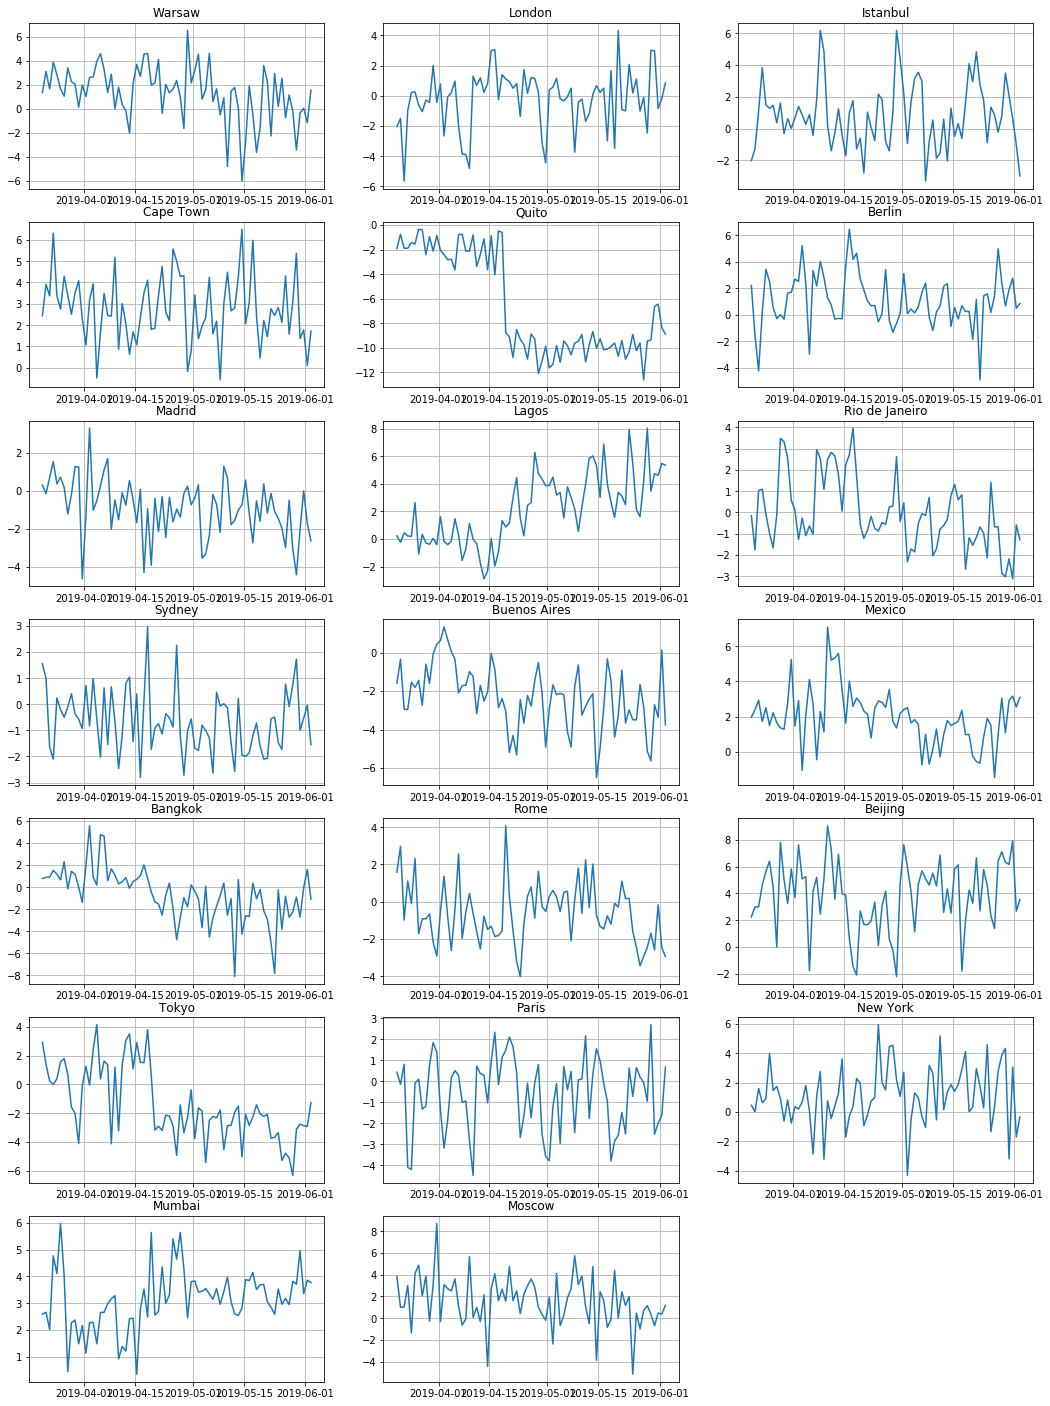

In [17]:
plotter(get_diff)

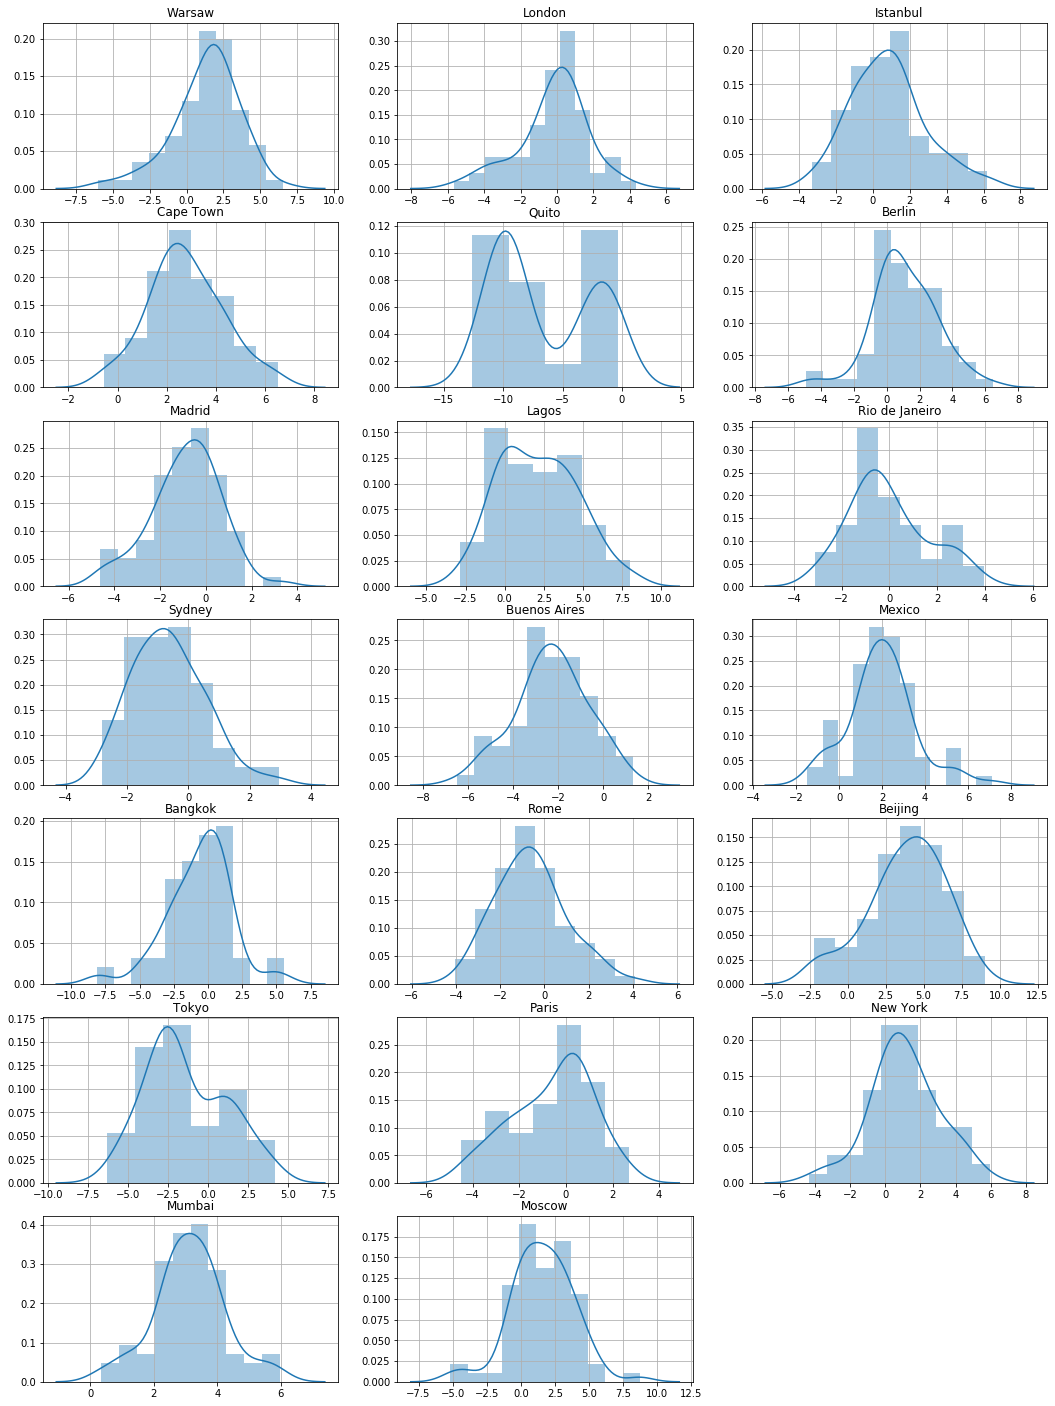

In [18]:
plotter(get_diff, sns.distplot)

In [19]:
# average forecast error
diff.groupby('city').mean()

days,1,2,3,4,5
city,,,,,
Bangkok,-0.608933,-0.637733,-0.853067,-0.592000,-0.561867
Beijing,3.970933,3.861467,3.903467,3.943200,4.104667
Berlin,0.917467,1.098667,1.260000,1.343733,2.028533
Buenos Aires,-1.971867,-2.302000,-2.338667,-2.236800,-2.198667
Cape Town,2.781467,2.777333,2.841333,2.904533,2.983867
Istanbul,0.685733,0.808400,0.683600,0.941600,1.015467
Lagos,2.314267,2.127067,2.087467,2.188533,2.133333
London,-0.258133,-0.215200,-0.227600,-0.111733,0.212933
Madrid,-0.608800,-0.886267,-0.925600,-0.721067,-0.864933
